## Visualize Summary of data sources

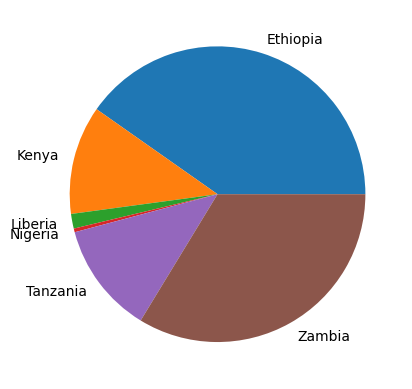

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
src_path = "./playground/data/esmap_lsms-tanzania_with_source.csv"
df = pd.read_csv(src_path)

source_lens = {}

for source, src_df in df.groupby("source"):

    source_lens[source.capitalize()] = len(src_df)
    
    
plt.pie(source_lens.values(), labels=source_lens.keys())
plt.savefig("./assets/datasource_distributions_pie.png")

## Appliances and Distribution

### Missing Applicances

In [10]:


appliance_missing_count = {}

PRESENCE_LIST = [
    'Presence_refrigerator/freezer', 'Presence_iron', 'Presence_fan',
    'Presence_DVD_player', 'Presence_radio/stereo',
    'Presence_phone_charger',
    'Presence_TV'
]


DRIVERS_LIST = ['Years_of_HHH_in_community',
                'Dwelling_quality_index', 'Hours_available_electricity',
                'Measurement_age', 'Monthly_expenditure', 'Number_of_rooms',
                'Climate_zone_lev_1', 'Climate_zone_lev_2',
                'Age_HHH', 'HH_with_home_business',
                'Education_level_HHH', 'Socio_status_HHH', 'Number_adults',
                'Ownership_motorized_vehicle', 'Ownership_small_livestock',
                'Ownership_large_livestock', 'Clean_fuel', 'Tariff_payment_frequency'
                ]
len_df  =len(df)
for col in PRESENCE_LIST:
    nan_df = df[df[col].isna()]
    appliance_missing_count[col] = f"{(len(nan_df) / len_df) *100:.2f}"
    

# plt.bar(appliance_missing_count.keys(), appliance_missing_count.values())
print(appliance_missing_count)

{'Presence_refrigerator/freezer': '7.41', 'Presence_iron': '18.44', 'Presence_fan': '7.41', 'Presence_DVD_player': '7.41', 'Presence_radio/stereo': '7.39', 'Presence_phone_charger': '58.69', 'Presence_TV': '47.66'}


### Most Common Appliances

In [3]:
common_appliances = {}
for col in PRESENCE_LIST:
    count_df = df[df[col] == 1]
    common_appliances[col] = f"{len(count_df) / len_df * 100:.2f}"
    
print(common_appliances)

{'Presence_refrigerator/freezer': '12.79', 'Presence_iron': '19.13', 'Presence_fan': '22.94', 'Presence_DVD_player': '10.80', 'Presence_radio/stereo': '22.00', 'Presence_phone_charger': '19.41', 'Presence_TV': '17.79'}


## Appliances per source

In [4]:
groups = df.groupby("source")

source_appliance_count = {}
sources = [s.capitalize() for s, _ in groups]

print(f"| Appliance | {' | '.join(sources)} |")

print(f"| --- | {' | '.join('-' * len(i) for i in sources)} |")

for col in PRESENCE_LIST:
    s = "| " + col+ " | "
    for src, src_df in groups:
        # s += f"{len(src_df[src_df[col] == 1]) / len(src_df) * 100:.2f} % | "
        owned_df = src_df[src_df[col] == 1]
        len_df = len(src_df)
        s += f"{len(owned_df) / len_df * 100:.2f} % | "
        
    print(s)
        

| Appliance | Ethiopia | Kenya | Liberia | Nigeria | Tanzania | Zambia |
| --- | -------- | ----- | ------- | ------- | -------- | ------ |
| Presence_refrigerator/freezer | 3.11 % | 4.00 % | 25.00 % | 39.53 % | 13.12 % | 26.44 % | 
| Presence_iron | 22.37 % | 7.22 % | 13.37 % | 44.19 % | 1.23 % | 25.89 % | 
| Presence_fan | 37.20 % | 0.31 % | 54.07 % | 65.12 % | 12.36 % | 15.73 % | 
| Presence_DVD_player | 0.35 % | 9.58 % | 18.60 % | 58.14 % | 21.87 % | 18.80 % | 
| Presence_radio/stereo | 0.09 % | 24.18 % | 55.23 % | 44.19 % | 52.42 % | 34.58 % | 
| Presence_phone_charger | 0.00 % | 23.63 % | 20.35 % | 67.44 % | 7.21 % | 44.88 % | 
| Presence_TV | 0.00 % | 20.25 % | 58.72 % | 62.79 % | 34.15 % | 29.79 % | 


## Missing  Appliances per source

In [ ]:
groups = df.groupby("source")

source_appliance_count = {}
sources = [s.capitalize() for s, _ in groups]

print(f"| Appliance | {' | '.join(sources)} |")

print(f"| --- | {' | '.join('-' * len(i) for i in sources)} |")

for col in PRESENCE_LIST:
    s = "| " + col+ " | "
    for src, src_df in groups:
        # s += f"{len(src_df[src_df[col] == 1]) / len(src_df) * 100:.2f} % | "
        owned_df = src_df[src_df[col].isna()]
        len_df = len(src_df)
        s += f"{len(owned_df) / len_df * 100:.2f} % | "
        
    print(s)
        

| Appliance | Ethiopia | Kenya | Liberia | Nigeria | Tanzania | Zambia |
| --- | -------- | ----- | ------- | ------- | -------- | ------ |
| Presence_refrigerator/freezer | 0.00 % | 54.55 % | 0.00 % | 0.00 % | 0.15 % | 2.69 % | 
| Presence_iron | 0.00 % | 54.55 % | 0.00 % | 0.00 % | 90.87 % | 2.69 % | 
| Presence_fan | 0.00 % | 54.55 % | 0.00 % | 0.00 % | 0.15 % | 2.69 % | 
| Presence_DVD_player | 0.00 % | 54.55 % | 0.00 % | 0.00 % | 0.15 % | 2.69 % | 
| Presence_radio/stereo | 0.00 % | 54.55 % | 0.00 % | 0.00 % | 0.00 % | 2.69 % | 
| Presence_phone_charger | 100.00 % | 54.55 % | 0.00 % | 0.00 % | 90.87 % | 2.69 % | 
| Presence_TV | 100.00 % | 54.55 % | 0.00 % | 0.00 % | 0.15 % | 2.69 % | 


In [7]:
100 - 54.55

45.45

In [9]:
print("Ownership")
for col in PRESENCE_LIST: 
    owned_df = df[df[col]== 1]
    len_df = len(df)
    print(f"{len(owned_df) / len_df * 100:.2f} %")
    
    
    
print ("Missing")
for col in PRESENCE_LIST: 
    miss_df = df[df[col].isna()]
    len_df = len(df)
    print(f"{len(miss_df) / len_df * 100:.2f} %")
    
        

Ownership
12.79 %
19.13 %
22.94 %
10.80 %
22.00 %
19.41 %
17.79 %
Missing
7.41 %
18.44 %
7.41 %
7.41 %
7.39 %
58.69 %
47.66 %


## Missing Drivers

In [ ]:
groups = df.groupby("source")

source_appliance_count = {}
sources = [s.capitalize() for s, _ in groups]

print(f"| Appliance | {' | '.join(sources)} | Total |")

print(f"| --- | {' | '.join('-' * len(i) for i in sources)} | ------ |")

for col in DRIVERS_LIST:
    s = "| " + col+ " | "
    for src, src_df in groups:
        missing = src_df[src_df[col].isna()]
        len_df = len(src_df)
        s += f"{len(missing) / len_df * 100:.2f} % | "
    
    
    print(s)
        